In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## importing spark for better performance

dataset = pd.read_excel("new dataset.xlsx")
dataset





,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


In [3]:
display(dataset.value_counts(), dataset.isnull().sum(), dataset.dtypes)

Year  Month  Day  Weekend?  Hour    Collision Type  Injury Type         Primary Factor                         Reported_Location        Latitude   Longitude 
2004  10     4    Weekday   1200.0  1-Car           No injury/unknown   SPEED TOO FAST FOR WEATHER CONDITIONS  BOLIN & ROCKPORT RD      39.103440  -86.574992    2
2008  9      1    Weekend   1800.0  2-Car           No injury/unknown   FOLLOWING TOO CLOSELY                  SR37N & WALNUT           39.250688  -86.529744    2
2012  1      2    Weekday   1600.0  1-Car           No injury/unknown   SPEED TOO FAST FOR WEATHER CONDITIONS  AMY & PETE ELLIS DR      39.169312  -86.495888    2
2011  12     3    Weekday   1100.0  1-Car           No injury/unknown   RAN OFF ROAD RIGHT                     SAMPLE & SR37N           39.267532  -86.522813    2
2004  10     6    Weekday   1200.0  2-Car           No injury/unknown   FOLLOWING TOO CLOSELY                  ATWATER & HIGHLAND       39.163200  -86.517584    2
                           

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

Year                   int64
Month                  int64
Day                    int64
Weekend?              object
Hour                 float64
Collision Type        object
Injury Type           object
Primary Factor        object
Reported_Location     object
Latitude             float64
Longitude            float64
dtype: object

In [4]:
trasnform = {'Year':str, 'Month':str, 'Day':str}
dataset = dataset.astype(trasnform)
dataset['Date'] = dataset['Year'] + "/" + dataset["Day"] + "/" + dataset["Month"]
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.strftime('%Y-%m-%d')

In [5]:
dataset.columns

Index(['Year', 'Month', 'Day', 'Weekend?', 'Hour', 'Collision Type',
       'Injury Type', 'Primary Factor', 'Reported_Location', 'Latitude',
       'Longitude', 'Date'],
      dtype='object')

In [6]:
dados = dataset[['Weekend?', 'Hour', 'Collision Type',
       'Injury Type', 'Primary Factor', 'Reported_Location', 'Latitude',
       'Longitude', 'Date']]

In [7]:
## substituir os valores nulos de Weekday? por 'Holiday'
dados['Weekend?'].fillna('Holiday', inplace=True)

/tmp/ipykernel_20610/24805464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Weekend?'].fillna('Holiday', inplace=True)


In [8]:
dados["Primary Factor"].isnull().sum()

1121

In [9]:
replace_dict = {"NONE (DRIVER)": "DRIVER FAULT",
    "NONE (ENVIRONMENTAL)": "ENVIRONMENT CAUSES",
    "NONE (VEHICLE)": "VEHICLE FAULT",
    "NONE (OTHER)": "NOT DETERMINED",
    }
dados["Primary Factor"].replace(replace_dict, inplace=True)

/tmp/ipykernel_20610/3419611738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Primary Factor"].replace(replace_dict, inplace=True)


In [10]:
dados["Primary Factor"].isnull().sum()

1121

In [11]:
#listar os dados nulos de primary factor
dados["Primary Factor"].fillna("NOT DETERMINED", inplace=True)

/tmp/ipykernel_20610/680147118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Primary Factor"].fillna("NOT DETERMINED", inplace=True)


In [12]:
dados.isnull().sum()

Weekend?               0
Hour                 225
Collision Type         6
Injury Type            0
Primary Factor         0
Reported_Location     35
Latitude              30
Longitude             30
Date                   0
dtype: int64

In [13]:
dados["Reported_Location"].fillna("NOT DETERMINED", inplace=True)
dados["Latitude"].fillna("0.0", inplace=True)
dados["Longitude"].fillna("0.0", inplace=True)
dados["Collision Type"].fillna("NOT DETERMINED", inplace=True)

/tmp/ipykernel_20610/326417502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Reported_Location"].fillna("NOT DETERMINED", inplace=True)
/tmp/ipykernel_20610/326417502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Latitude"].fillna("0.0", inplace=True)
/tmp/ipykernel_20610/326417502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Longitude"].fillna("0.0", inplace=True)
/tmp/ipykernel_20610/326417502.

In [14]:
dados["Day"] = dados["Weekend?"]

/tmp/ipykernel_20610/1335887557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Day"] = dados["Weekend?"]


In [15]:
dados_limpos = dados[['Day', 'Collision Type','Injury Type', 'Primary Factor', 'Reported_Location', 'Latitude', 'Longitude', 'Date']]

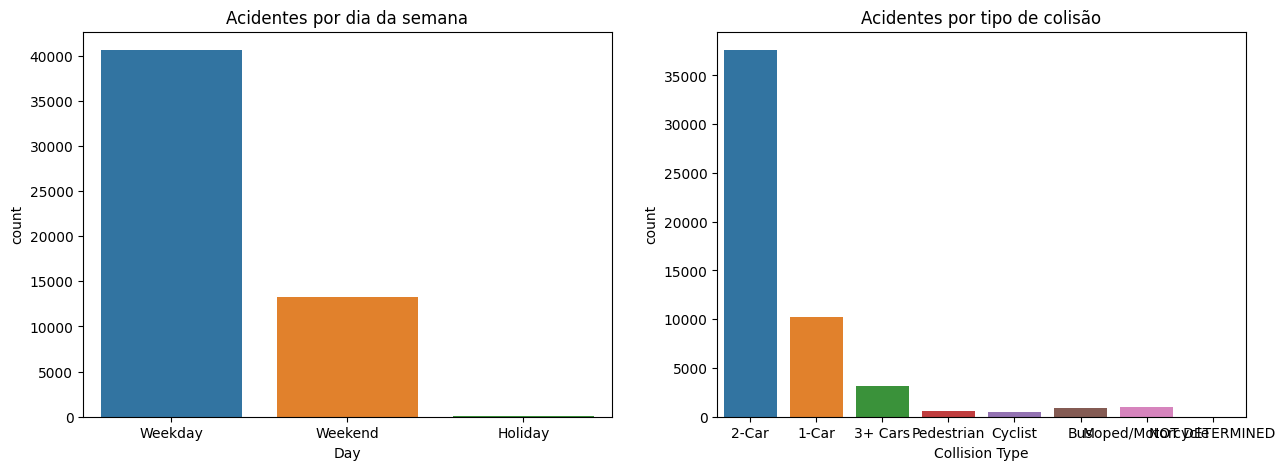

In [16]:
## agora que temos os dados limpos podemos criar dashboards visualizar informações sobre os dados

## dashboard 1 - acidentes por dia da semana
## dashboard 3 - acidentes por tipo de colisão
# criando um ao lado do outro

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=dados_limpos, x='Day', ax=axs[0])
axs[0].set_title('Acidentes por dia da semana')

sns.countplot(data=dados_limpos, x='Collision Type', ax=axs[1])
axs[1].set_title('Acidentes por tipo de colisão')

plt.show()

In [17]:
#dados_limpos.to_excel("dados_limpos.xlsx", index=False)

In [22]:
dados_limpos['Date'] = pd.to_datetime(dados_limpos['Date'])


/tmp/ipykernel_20610/3041699100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos['Date'] = pd.to_datetime(dados_limpos['Date'])


In [24]:
dados_limpos["Date"].sort_values(ascending=True)

53607   2003-01-01
51947   2003-01-01
51910   2003-01-01
51705   2003-01-01
50571   2003-01-01
           ...    
4271    2015-07-12
4212    2015-07-12
4275    2015-07-12
4036    2015-07-12
4127    2015-07-12
Name: Date, Length: 53943, dtype: datetime64[ns]

In [25]:
dados_limpos.dtypes

Day                          object
Collision Type               object
Injury Type                  object
Primary Factor               object
Reported_Location            object
Latitude                     object
Longitude                    object
Date                 datetime64[ns]
dtype: object

In [26]:
dados_limpos["Injury Type"].value_counts()
change_description = {"No injury/unknown": "No injury", "Non-incapacitating injury": "No Incapacitating", "Fatal injury": "Fatal"}
dados_limpos["Injury Type"].replace(change_description, inplace=True)

Injury Type
No injury/unknown     41603
Non-incapacitating    11136
Incapacitating         1089
Fatal                   115
Name: count, dtype: int64

<Axes: xlabel='Reported_Location'>

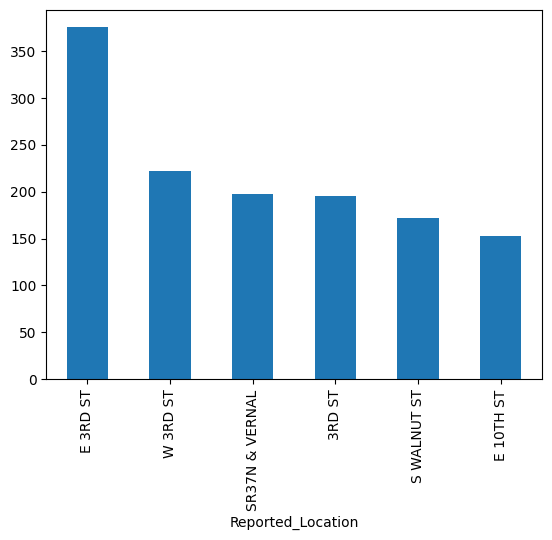

In [35]:
dados_limpos["Reported_Location"].value_counts()
## quero visualizar apenas os 6 primeiros locais mais reportados
dados_limpos["Reported_Location"].value_counts().head(6)
# e para gerar um gráfico de barras com esses dados
dados_limpos["Reported_Location"].value_counts().head(6).plot(kind='bar')


In [38]:
dados_limpos["Reported_Location"].value_counts()


Reported_Location
E 3RD ST                         375
W 3RD ST                         222
SR37N & VERNAL                   197
3RD ST                           195
S WALNUT ST                      172
                                ... 
GARRISON CHAPEL RD & TRENDMAR      1
GOODNIGHT & S CLARIZZ BLVD         1
ADAIR & PLEASANT RIDGE RD          1
BRIGHTON CRST & SMITH              1
MONROW & THIRD ST                  1
Name: count, Length: 19365, dtype: int64